In [86]:
import matplotlib.pyplot as plt
import csv
import numpy as np

with open("../datasets/podst-ext.csv", "r") as f1:
    reader_g = csv.reader(f1)
    with open("../datasets/podst-loc.csv", "r") as f2:
        reader_loc = csv.reader(f2)
        
        data_loc = []
        for l in reader_loc:
            data_loc.append(l)
        
        locations = []
        i = 0
        for g in reader_g:
            for l in data_loc:
                if g[0] == l[0]:
                    if g[1] == 'm.Kraków' and float(l[2]) > 0 and float(l[3]) > 0:
                        locations.append((float(l[2]), float(l[3]), float(g[20]))) 


print(locations)
        
print(len(locations), len(data_loc))
locations = np.asarray(locations)



[(50.089332, 19.94124, 0.7149255489397632), (50.0860984, 19.9170561, 0.485643113308856), (50.0847238, 19.9027096, 0.5868785478902236), (50.084539, 19.847098, 0.6105612431231981), (50.0872962, 19.928737, 0.6150423239460817), (50.0897814, 19.9231717, 0.6480520414938405), (50.05575229999999, 19.9174025, 0.6504311145104903), (50.055802, 19.9043209, 0.6323819113883093), (50.0739619, 19.9217543, 0.7440386681907135), (50.07584749999999, 19.9224642, 0.6620889967464267), (50.0442051, 19.8247563, 0.6381926155985194), (50.0699775, 19.9149319, 0.6372218040076828), (50.084408, 19.882034, 0.7278748415918381), (50.0963489, 19.884809, 0.6607196310244022), (50.0940377, 19.933849, 0.5506420031056045), (50.1068077, 19.9056602, 0.6108984628751973), (50.0641669, 19.8653745, 0.6250635532940311), (50.07342269999999, 19.9003658, 0.6941754660591964), (50.0928321, 19.9476216, 0.6512833071436752), (50.0841861, 19.9222824, 0.8368909950685827), (50.0871414, 19.9284337, 0.6963222437573573), (50.1022455, 19.9442872,

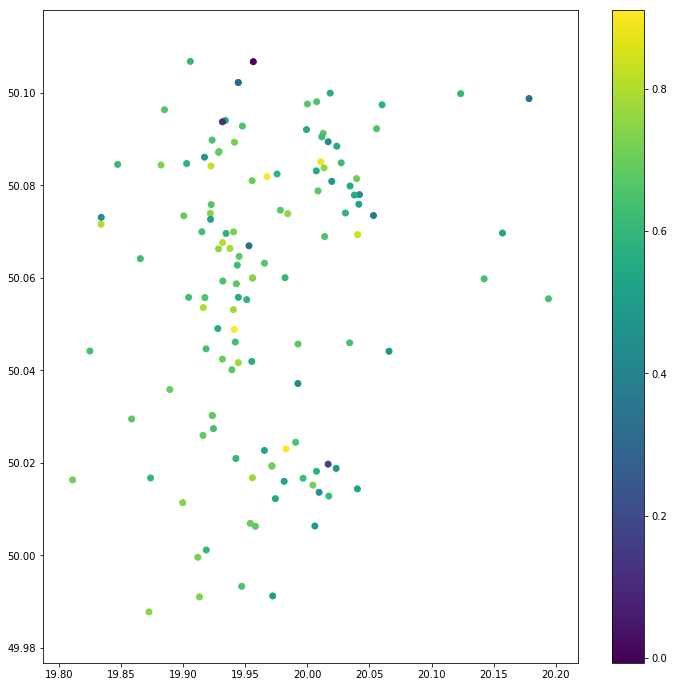

In [91]:
# %pylab inline
# pylab.rcParams['figure.figsize'] = (12, 12)

plt.scatter(locations[...,1], locations[...,0], c = locations[...,2], marker = 'o')
    
plt.colorbar()
plt.show()


[[  0.71492555  19.94124     50.089332   176.6253431 ]
 [  0.48564311  19.9170561   50.0860984  160.49882937]
 [  0.58687855  19.9027096   50.0847238  151.57150464]
 [  0.61056124  19.847098    50.084539   122.09516012]
 [  0.61504232  19.928737    50.0872962  168.27833641]]
[[  0.71492555  19.94124     50.089332   173.48945739]
 [  0.48564311  19.9170561   50.0860984  157.65603518]
 [  0.58687855  19.9027096   50.0847238  148.94376193]
 [  0.61056124  19.847098    50.084539   120.67495235]
 [  0.61504232  19.928737    50.0872962  165.28672815]]
[[  0.71492555  19.94124     50.089332   170.38976443]
 [  0.48564311  19.9170561   50.0860984  154.86438141]
 [  0.58687855  19.9027096   50.0847238  146.37816579]
 [  0.61056124  19.847098    50.084539   119.37194027]
 [  0.61504232  19.928737    50.0872962  162.3385552 ]]
[[  0.71492555  19.94124     50.089332   167.32827563]
 [  0.48564311  19.9170561   50.0860984  152.12668349]
 [  0.58687855  19.9027096   50.0847238  143.87804078]
 [  0.6

[[  0.71492555  19.94124     50.089332   194.48557742]
 [  0.48564311  19.9170561   50.0860984  217.27328006]
 [  0.58687855  19.9027096   50.0847238  230.70799427]
 [  0.61056124  19.847098    50.084539   281.80098674]
 [  0.61504232  19.928737    50.0872962  206.39456219]]
[[  0.71492555  19.94124     50.089332   197.96646136]
 [  0.48564311  19.9170561   50.0860984  220.83303519]
 [  0.58687855  19.9027096   50.0847238  234.30856113]
 [  0.61056124  19.847098    50.084539   285.53635867]
 [  0.61504232  19.928737    50.0872962  209.91621972]]
[[  0.71492555  19.94124     50.089332   201.46662211]
 [  0.48564311  19.9170561   50.0860984  224.40762159]
 [  0.58687855  19.9027096   50.0847238  237.92188848]
 [  0.61056124  19.847098    50.084539   289.27880691]
 [  0.61504232  19.928737    50.0872962  213.45473362]]
[[  0.71492555  19.94124     50.089332   204.9850722 ]
 [  0.48564311  19.9170561   50.0860984  227.9963417 ]
 [  0.58687855  19.9027096   50.0847238  241.54740367]
 [  0.6

[[  0.71492555  19.94124     50.089332    81.14224439]
 [  0.48564311  19.9170561   50.0860984   90.13755616]
 [  0.58687855  19.9027096   50.0847238   97.51108767]
 [  0.61056124  19.847098    50.084539   133.76249147]
 [  0.61504232  19.928737    50.0872962   85.3934055 ]]
[[  0.71492555  19.94124     50.089332    81.67094847]
 [  0.48564311  19.9170561   50.0860984   91.6751342 ]
 [  0.58687855  19.9027096   50.0847238   99.51248876]
 [  0.61056124  19.847098    50.084539   136.86350911]
 [  0.61504232  19.928737    50.0872962   86.47622623]]
[[  0.71492555  19.94124     50.089332    82.39067802]
 [  0.48564311  19.9170561   50.0860984   93.35888511]
 [  0.58687855  19.9027096   50.0847238  101.63197636]
 [  0.61056124  19.847098    50.084539   140.01012865]
 [  0.61504232  19.928737    50.0872962   87.72822638]]
[[  0.71492555  19.94124     50.089332    83.29648146]
 [  0.48564311  19.9170561   50.0860984   95.18105184]
 [  0.58687855  19.9027096   50.0847238  103.86232146]
 [  0.6

[[  0.71492555  19.94124     50.089332   128.6712393 ]
 [  0.48564311  19.9170561   50.0860984  110.4055788 ]
 [  0.58687855  19.9027096   50.0847238  100.42847116]
 [  0.61056124  19.847098    50.084539    71.53441217]
 [  0.61504232  19.928737    50.0872962  119.1570061 ]]
[[  0.71492555  19.94124     50.089332   125.22926105]
 [  0.48564311  19.9170561   50.0860984  107.27974194]
 [  0.58687855  19.9027096   50.0847238   97.57151746]
 [  0.61056124  19.847098    50.084539    70.68513369]
 [  0.61504232  19.928737    50.0872962  115.86412777]]
[[  0.71492555  19.94124     50.089332   121.82137671]
 [  0.48564311  19.9170561   50.0860984  104.21369502]
 [  0.58687855  19.9027096   50.0847238   94.79727959]
 [  0.61056124  19.847098    50.084539    70.05429412]
 [  0.61504232  19.928737    50.0872962  112.61705068]]
[[  0.71492555  19.94124     50.089332   118.45052902]
 [  0.48564311  19.9170561   50.0860984  101.21287186]
 [  0.58687855  19.9027096   50.0847238   92.11323151]
 [  0.6

[[ 0.71492555 19.94124    50.089332   59.29532717]
 [ 0.48564311 19.9170561  50.0860984  55.98507506]
 [ 0.58687855 19.9027096  50.0847238  58.37838828]
 [ 0.61056124 19.847098   50.084539   88.19095263]
 [ 0.61504232 19.928737   50.0872962  56.65408108]]
[[ 0.71492555 19.94124    50.089332   57.5674893 ]
 [ 0.48564311 19.9170561  50.0860984  55.90956832]
 [ 0.58687855 19.9027096  50.0847238  59.28203285]
 [ 0.61056124 19.847098   50.084539   91.26258886]
 [ 0.61504232 19.928737   50.0872962  55.74754617]]
[[ 0.71492555 19.94124    50.089332   56.07223755]
 [ 0.48564311 19.9170561  50.0860984  56.11979178]
 [ 0.58687855 19.9027096  50.0847238  60.4374273 ]
 [ 0.61056124 19.847098   50.084539   94.40379296]
 [ 0.61504232 19.928737   50.0872962  55.11708359]]
[[ 0.71492555 19.94124    50.089332   54.82860407]
 [ 0.48564311 19.9170561  50.0860984  56.61256247]
 [ 0.58687855 19.9027096  50.0847238  61.83046028]
 [ 0.61056124 19.847098   50.084539   97.60784869]
 [ 0.61504232 19.928737   50

[[  0.71492555  19.94124     50.089332   181.37801362]
 [  0.48564311  19.9170561   50.0860984  205.68374129]
 [  0.58687855  19.9027096   50.0847238  219.99975141]
 [  0.61056124  19.847098    50.084539   274.69000005]
 [  0.61504232  19.928737    50.0872962  194.02086925]]
[[  0.71492555  19.94124     50.089332   185.27834149]
 [  0.48564311  19.9170561   50.0860984  209.59330292]
 [  0.58687855  19.9027096   50.0847238  223.91563996]
 [  0.61056124  19.847098    50.084539   278.63562609]
 [  0.61504232  19.928737    50.0872962  197.92473747]]
[[  0.71492555  19.94124     50.089332   189.18283174]
 [  0.48564311  19.9170561   50.0860984  213.50621497]
 [  0.58687855  19.9027096   50.0847238  227.8344509 ]
 [  0.61056124  19.847098    50.084539   282.58278101]
 [  0.61504232  19.928737    50.0872962  201.83237031]]
[[  0.71492555  19.94124     50.089332   193.09123187]
 [  0.48564311  19.9170561   50.0860984  217.42229653]
 [  0.58687855  19.9027096   50.0847238  231.75603599]
 [  0.6

[[  0.71492555  19.94124     50.089332   242.4607841 ]
 [  0.48564311  19.9170561   50.0860984  266.85760666]
 [  0.58687855  19.9027096   50.0847238  281.26576937]
 [  0.61056124  19.847098    50.084539   336.56944027]
 [  0.61504232  19.928737    50.0872962  255.11736613]]
[[  0.71492555  19.94124     50.089332   246.43317923]
 [  0.48564311  19.9170561   50.0860984  270.82934374]
 [  0.58687855  19.9027096   50.0847238  285.23806937]
 [  0.61056124  19.847098    50.084539   340.54985556]
 [  0.61504232  19.928737    50.0872962  259.08873867]]
[[  0.71492555  19.94124     50.089332   250.40645324]
 [  0.48564311  19.9170561   50.0860984  274.8019007 ]
 [  0.58687855  19.9027096   50.0847238  289.21113294]
 [  0.61056124  19.847098    50.084539   344.5307245 ]
 [  0.61504232  19.928737    50.0872962  263.06097868]]
[[  0.71492555  19.94124     50.089332   254.38056495]
 [  0.48564311  19.9170561   50.0860984  278.7752425 ]
 [  0.58687855  19.9027096   50.0847238  293.18492904]
 [  0.6

[[  0.71492555  19.94124     50.089332   241.33627954]
 [  0.48564311  19.9170561   50.0860984  265.69031565]
 [  0.58687855  19.9027096   50.0847238  280.09963266]
 [  0.61056124  19.847098    50.084539   335.58892134]
 [  0.61504232  19.928737    50.0872962  253.95271076]]
[[  0.71492555  19.94124     50.089332   245.32688361]
 [  0.48564311  19.9170561   50.0860984  269.67924471]
 [  0.58687855  19.9027096   50.0847238  284.08823879]
 [  0.61056124  19.847098    50.084539   339.58083003]
 [  0.61504232  19.928737    50.0872962  257.94201539]]
[[  0.71492555  19.94124     50.089332   249.31778882]
 [  0.48564311  19.9170561   50.0860984  273.66849696]
 [  0.58687855  19.9027096   50.0847238  288.07716088]
 [  0.61056124  19.847098    50.084539   343.57292694]
 [  0.61504232  19.928737    50.0872962  261.93164624]]
[[  0.71492555  19.94124     50.089332   253.30898094]
 [  0.48564311  19.9170561   50.0860984  277.65805846]
 [  0.58687855  19.9027096   50.0847238  292.06638598]
 [  0.6

 [  0.61504232  19.928737    50.0872962  149.41346694]]
[[  0.71492555  19.94124     50.089332   140.83738078]
 [  0.48564311  19.9170561   50.0860984  165.13305372]
 [  0.58687855  19.9027096   50.0847238  179.53020754]
 [  0.61056124  19.847098    50.084539   235.09245017]
 [  0.61504232  19.928737    50.0872962  153.40954372]]
[[  0.71492555  19.94124     50.089332   144.83524372]
 [  0.48564311  19.9170561   50.0860984  169.12858017]
 [  0.58687855  19.9027096   50.0847238  183.52498091]
 [  0.61056124  19.847098    50.084539   239.08926393]
 [  0.61504232  19.928737    50.0872962  157.40581979]]
[[  0.71492555  19.94124     50.089332   148.83322151]
 [  0.48564311  19.9170561   50.0860984  173.12431323]
 [  0.58687855  19.9027096   50.0847238  187.51997712]
 [  0.61056124  19.847098    50.084539   243.08618251]
 [  0.61504232  19.928737    50.0872962  161.40228035]]
[[  0.71492555  19.94124     50.089332   152.83130512]
 [  0.48564311  19.9170561   50.0860984  177.12023891]
 [  0.

[[ 0.71492555 19.94124    50.089332   64.24727095]
 [ 0.48564311 19.9170561  39.88687791 50.0860984 ]
 [ 0.58687855 19.9027096  25.60808112 50.0847238 ]
 [ 0.61056124 19.847098   31.58626482 50.084539  ]
 [ 0.61504232 19.928737   50.0872962  51.58161013]]
[[ 0.71492555 19.94124    50.089332   60.31410966]
 [ 0.48564311 19.9170561  35.97935838 50.0860984 ]
 [ 0.58687855 19.9027096  21.77376905 50.0847238 ]
 [ 0.61056124 19.847098   35.50926816 50.084539  ]
 [ 0.61504232 19.928737   47.6525603  50.0872962 ]]
[[ 0.71492555 19.94124    50.089332   56.39035222]
 [ 0.48564311 19.9170561  32.09463241 50.0860984 ]
 [ 0.58687855 18.01166896 19.9027096  50.0847238 ]
 [ 0.61056124 19.847098   39.44773916 50.084539  ]
 [ 0.61504232 19.928737   43.73637506 50.0872962 ]]
[[ 0.71492555 19.94124    50.089332   52.47810805]
 [ 0.48564311 19.9170561  28.24210739 50.0860984 ]
 [ 0.58687855 14.37857499 19.9027096  50.0847238 ]
 [ 0.61056124 19.847098   43.3974668  50.084539  ]
 [ 0.61504232 19.928737   39

[[  0.71492555  19.94124     50.089332    57.68881888]
 [  0.48564311  19.9170561   50.0860984   79.52552691]
 [  0.58687855  19.9027096   50.0847238   93.19076037]
 [  0.61056124  19.847098    50.084539   148.06718787]
 [  0.61504232  19.928737    50.0872962   68.64974365]]
[[  0.71492555  19.94124     50.089332    61.36839434]
 [  0.48564311  19.9170561   50.0860984   83.40180232]
 [  0.58687855  19.9027096   50.0847238   97.11251731]
 [  0.61056124  19.847098    50.084539   152.03653549]
 [  0.61504232  19.928737    50.0872962   72.46303405]]
[[  0.71492555  19.94124     50.089332    65.08578819]
 [  0.48564311  19.9170561   50.0860984   87.28924235]
 [  0.58687855  19.9027096   50.0847238  101.04040884]
 [  0.61056124  19.847098    50.084539   156.00744894]
 [  0.61504232  19.928737    50.0872962   76.29544746]]
[[  0.71492555  19.94124     50.089332    68.8348736 ]
 [  0.48564311  19.9170561   50.0860984   91.18641911]
 [  0.58687855  19.9027096   50.0847238  104.97374633]
 [  0.6

 [  0.61504232  19.928737    50.0872962  160.74914651]]
[[  0.71492555  19.94124     50.089332   152.89829242]
 [  0.48564311  19.9170561   50.0860984  175.8974128 ]
 [  0.58687855  19.9027096   50.0847238  189.79369278]
 [  0.61056124  19.847098    50.084539   244.81424004]
 [  0.61504232  19.928737    50.0872962  164.66448343]]
[[  0.71492555  19.94124     50.089332   156.79275437]
 [  0.48564311  19.9170561   50.0860984  179.83172976]
 [  0.58687855  19.9027096   50.0847238  193.74201666]
 [  0.61056124  19.847098    50.084539   248.78349649]
 [  0.61504232  19.928737    50.0872962  168.58379549]]
[[  0.71492555  19.94124     50.089332   160.69240126]
 [  0.48564311  19.9170561   50.0860984  183.76888265]
 [  0.58687855  19.9027096   50.0847238  197.69241821]
 [  0.61056124  19.847098    50.084539   252.75372228]
 [  0.61504232  19.928737    50.0872962  172.50681176]]
[[  0.71492555  19.94124     50.089332   164.59686456]
 [  0.48564311  19.9170561   50.0860984  187.70869301]
 [  0.

 [  0.61504232  19.928737    50.0872962  121.21385442]]
[[  0.71492555  19.94124     50.089332   129.81968966]
 [  0.48564311  19.9170561   50.0860984  106.53224033]
 [  0.58687855  19.9027096   50.0847238   93.25852786]
 [  0.61056124  19.847098    50.084539    52.87521277]
 [  0.61504232  19.928737    50.0872962  117.57084036]]
[[  0.71492555  19.94124     50.089332   126.15558578]
 [  0.48564311  19.9170561   50.0860984  102.97897567]
 [  0.58687855  19.9027096   50.0847238   89.81913058]
 [  0.61056124  19.847098    50.084539    51.09798553]
 [  0.61504232  19.928737    50.0872962  113.95177271]]
[[  0.71492555  19.94124     50.089332   122.5124966 ]
 [  0.48564311  19.9170561   50.0860984   99.45964322]
 [  0.58687855  19.9027096   50.0847238   86.42800136]
 [  0.61056124  19.847098    49.58044095  50.084539  ]
 [  0.61504232  19.928737    50.0872962  110.35900735]]
[[  0.71492555  19.94124     50.089332   118.89235393]
 [  0.48564311  19.9170561   50.0860984   95.97797575]
 [  0.

 [  0.61504232  19.928737    50.0872962   61.30921059]]
[[  0.71492555  19.94124     50.089332    63.74448858]
 [  0.48564311  19.9170561   50.0860984   62.44127985]
 [  0.58687855  19.9027096   50.0847238   66.54001667]
 [  0.61056124  19.847098    50.084539   104.77963602]
 [  0.61504232  19.928737    50.0872962   61.52173034]]
[[  0.71492555  19.94124     50.089332    63.41482338]
 [  0.48564311  19.9170561   50.0860984   63.64326068]
 [  0.58687855  19.9027096   50.0847238   68.51202098]
 [  0.61056124  19.847098    50.084539   108.12024845]
 [  0.61504232  19.928737    50.0872962   61.99215518]]
[[  0.71492555  19.94124     50.089332    63.33655993]
 [  0.48564311  19.9170561   50.0860984   65.06931558]
 [  0.58687855  19.9027096   50.0847238   70.65564534]
 [  0.61056124  19.847098    50.084539   111.50427851]
 [  0.61504232  19.928737    50.0872962   62.71468172]]
[[  0.71492555  19.94124     50.089332    63.51062765]
 [  0.48564311  19.9170561   50.0860984   66.70507499]
 [  0.

[[ 0.71492555 19.94124    50.089332   86.85970196]
 [ 0.48564311 19.9170561  50.0860984  74.57421961]
 [ 0.58687855 19.9027096  50.0847238  70.88043608]
 [ 0.61056124 19.847098   50.084539   86.98714919]
 [ 0.61504232 19.928737   50.0872962  79.4801617 ]]
[[ 0.71492555 19.94124    50.089332   84.93931848]
 [ 0.48564311 19.9170561  50.0860984  73.65368579]
 [ 0.58687855 19.9027096  50.0847238  70.72735976]
 [ 0.61056124 19.847098   50.084539   89.38668875]
 [ 0.61504232 19.928737   50.0872962  78.02051079]]
[[ 0.71492555 19.94124    50.089332   83.16710783]
 [ 0.48564311 19.9170561  50.0860984  72.9411861 ]
 [ 0.58687855 19.9027096  50.0847238  70.80030098]
 [ 0.61056124 19.847098   50.084539   91.8977482 ]
 [ 0.61504232 19.928737   50.0872962  76.74180154]]
[[ 0.71492555 19.94124    50.089332   81.55273033]
 [ 0.48564311 19.9170561  50.0860984  72.44285907]
 [ 0.58687855 19.9027096  50.0847238  71.09856411]
 [ 0.61056124 19.847098   50.084539   94.51143912]
 [ 0.61504232 19.928737   50

 [  0.61504232  19.928737    50.0872962  113.40661755]]
[[  0.71492555  19.94124     50.089332   120.64732   ]
 [  0.48564311  19.9170561   50.0860984  102.76265776]
 [  0.58687855  19.9027096   50.0847238   94.03284223]
 [  0.61056124  19.847098    50.084539    83.25587141]
 [  0.61504232  19.928737    50.0872962  110.81139338]]
[[  0.71492555  19.94124     50.089332   117.92309284]
 [  0.48564311  19.9170561   50.0860984  100.51723748]
 [  0.58687855  19.9027096   50.0847238   92.19814867]
 [  0.61056124  19.847098    50.084539    83.87345304]
 [  0.61504232  19.928737    50.0872962  108.30174931]]
[[  0.71492555  19.94124     50.089332   115.27330924]
 [  0.48564311  19.9170561   50.0860984   98.38326194]
 [  0.58687855  19.9027096   50.0847238   90.50315916]
 [  0.61056124  19.847098    50.084539    84.67568792]
 [  0.61504232  19.928737    50.0872962  105.88377073]]
[[  0.71492555  19.94124     50.089332   112.70322011]
 [  0.48564311  19.9170561   50.0860984   96.36813493]
 [  0.

[[  0.71492555  19.94124     50.089332    99.38482693]
 [  0.48564311  19.9170561   50.0860984   98.35420393]
 [  0.58687855  19.9027096   50.0847238  101.08417591]
 [  0.61056124  19.847098    50.084539   131.15180565]
 [  0.61504232  19.928737    50.0872962   97.73614328]]
[[  0.71492555  19.94124     50.089332    99.33490738]
 [  0.48564311  19.9170561   50.0860984   99.28293222]
 [  0.58687855  19.9027096   50.0847238  102.54917756]
 [  0.61056124  19.847098    50.084539   133.95526165]
 [  0.61504232  19.928737    50.0872962   98.19601674]]
[[  0.71492555  19.94124     50.089332    99.44598445]
 [  0.48564311  19.9170561   50.0860984  100.36260175]
 [  0.58687855  19.9027096   50.0847238  104.14728522]
 [  0.61056124  19.847098    50.084539   136.81823024]
 [  0.61504232  19.928737    50.0872962   98.81579683]]
[[  0.71492555  19.94124     50.089332    99.71752015]
 [  0.48564311  19.9170561   50.0860984  101.58840007]
 [  0.58687855  19.9027096   50.0847238  105.87247149]
 [  0.6

[[  0.71492555  19.94124     50.089332   150.15788965]
 [  0.48564311  19.9170561   50.0860984  165.2157445 ]
 [  0.58687855  19.9027096   50.0847238  175.47588159]
 [  0.61056124  19.847098    50.084539   222.12012094]
 [  0.61504232  19.928737    50.0872962  157.39811468]]
[[  0.71492555  19.94124     50.089332   152.87076838]
 [  0.48564311  19.9170561   50.0860984  168.26108709]
 [  0.58687855  19.9027096   50.0847238  178.66759141]
 [  0.61056124  19.847098    50.084539   225.63812649]
 [  0.61504232  19.928737    50.0872962  160.30056302]]
[[  0.71492555  19.94124     50.089332   155.63917188]
 [  0.48564311  19.9170561   50.0860984  171.34568751]
 [  0.58687855  19.9027096   50.0847238  181.89126262]
 [  0.61056124  19.847098    50.084539   229.17194445]
 [  0.61504232  19.928737    50.0872962  163.24942421]]
[[  0.71492555  19.94124     50.089332   158.46019003]
 [  0.48564311  19.9170561   50.0860984  174.46746353]
 [  0.58687855  19.9027096   50.0847238  185.14522575]
 [  0.6

[[  0.71492555  19.94124     50.089332   156.64665915]
 [  0.48564311  19.9170561   50.0860984  141.05649021]
 [  0.58687855  19.9027096   50.0847238  133.56434037]
 [  0.61056124  19.847098    50.084539   122.57335814]
 [  0.61504232  19.928737    50.0872962  147.98193438]]
[[  0.71492555  19.94124     50.089332   154.35107976]
 [  0.48564311  19.9170561   50.0860984  139.19944192]
 [  0.58687855  19.9027096   50.0847238  132.0369502 ]
 [  0.61056124  19.847098    50.084539   122.7332234 ]
 [  0.61504232  19.928737    50.0872962  145.89296386]]
[[  0.71492555  19.94124     50.089332   152.12605242]
 [  0.48564311  19.9170561   50.0860984  137.43375069]
 [  0.58687855  19.9027096   50.0847238  130.61423896]
 [  0.61056124  19.847098    50.084539   123.02300649]
 [  0.61504232  19.928737    50.0872962  143.88488768]]
[[  0.71492555  19.94124     50.089332   149.97471728]
 [  0.48564311  19.9170561   50.0860984  135.76298107]
 [  0.58687855  19.9027096   50.0847238  129.2996621 ]
 [  0.6

[[  0.71492555  19.94124     50.089332   140.33639522]
 [  0.48564311  19.9170561   50.0860984  142.12381021]
 [  0.58687855  19.9027096   50.0847238  145.62805574]
 [  0.61056124  19.847098    50.084539   174.35594663]
 [  0.61504232  19.928737    50.0872962  140.38009012]]
[[  0.71492555  19.94124     50.089332   140.87009556]
 [  0.48564311  19.9170561   50.0860984  143.32734781]
 [  0.58687855  19.9027096   50.0847238  147.19325331]
 [  0.61056124  19.847098    50.084539   176.9271379 ]
 [  0.61504232  19.928737    50.0872962  141.2680916 ]]
[[  0.71492555  19.94124     50.089332   141.51488905]
 [  0.48564311  19.9170561   50.0860984  144.63153124]
 [  0.58687855  19.9027096   50.0847238  148.84951131]
 [  0.61056124  19.847098    50.084539   179.55062831]
 [  0.61504232  19.928737    50.0872962  142.26305811]]
[[  0.71492555  19.94124     50.089332   142.26926521]
 [  0.48564311  19.9170561   50.0860984  146.03366403]
 [  0.58687855  19.9027096   50.0847238  150.5938253 ]
 [  0.6

[[  0.71492555  19.94124     50.089332   208.60442906]
 [  0.48564311  19.9170561   50.0860984  190.71399904]
 [  0.58687855  19.9027096   50.0847238  181.27351549]
 [  0.61056124  19.847098    50.084539   157.14903794]
 [  0.61504232  19.928737    50.0872962  198.90196606]]
[[  0.71492555  19.94124     50.089332   205.95603372]
 [  0.48564311  19.9170561   50.0860984  188.3278541 ]
 [  0.58687855  19.9027096   50.0847238  179.08213372]
 [  0.61056124  19.847098    50.084539   156.04818527]
 [  0.61504232  19.928737    50.0872962  196.37743278]]
[[  0.71492555  19.94124     50.089332   203.35183261]
 [  0.48564311  19.9170561   50.0860984  185.99712855]
 [  0.58687855  19.9027096   50.0847238  176.95404437]
 [  0.61056124  19.847098    50.084539   155.0427429 ]
 [  0.61504232  19.928737    50.0872962  193.90255311]]
[[  0.71492555  19.94124     50.089332   200.79354527]
 [  0.48564311  19.9170561   50.0860984  183.72393157]
 [  0.58687855  19.9027096   50.0847238  174.89155788]
 [  0.6

[[  0.71492555  19.94124     50.089332   167.3337259 ]
 [  0.48564311  19.9170561   50.0860984  165.98338179]
 [  0.58687855  19.9027096   50.0847238  167.40003172]
 [  0.61056124  19.847098    50.084539   188.21614204]
 [  0.61504232  19.928737    50.0872962  165.82744316]]
[[  0.71492555  19.94124     50.089332   167.39968884]
 [  0.48564311  19.9170561   50.0860984  166.6314323 ]
 [  0.58687855  19.9027096   50.0847238  168.38376946]
 [  0.61056124  19.847098    50.084539   190.26437429]
 [  0.61504232  19.928737    50.0872962  166.1952012 ]]
[[  0.71492555  19.94124     50.089332   167.56114055]
 [  0.48564311  19.9170561   50.0860984  167.37259462]
 [  0.58687855  19.9027096   50.0847238  169.45623924]
 [  0.61056124  19.847098    50.084539   192.37397985]
 [  0.61504232  19.928737    50.0872962  166.65817983]]
[[  0.71492555  19.94124     50.089332   167.81780544]
 [  0.48564311  19.9170561   50.0860984  168.20563793]
 [  0.58687855  19.9027096   50.0847238  170.61576779]
 [  0.6

[[  0.71492555  19.94124     50.089332   257.48053096]
 [  0.48564311  19.9170561   50.0860984  273.25482581]
 [  0.58687855  19.9027096   50.0847238  283.52602882]
 [  0.61056124  19.847098    50.084539   329.01396342]
 [  0.61504232  19.928737    50.0872962  265.22939826]]
[[  0.71492555  19.94124     50.089332   260.36571169]
 [  0.48564311  19.9170561   50.0860984  276.32544405]
 [  0.58687855  19.9027096   50.0847238  286.68681905]
 [  0.61056124  19.847098    50.084539   332.41149818]
 [  0.61504232  19.928737    50.0872962  268.2177058 ]]
[[  0.71492555  19.94124     50.089332   263.28004828]
 [  0.48564311  19.9170561   50.0860984  279.41958097]
 [  0.58687855  19.9027096   50.0847238  289.86834153]
 [  0.61056124  19.847098    50.084539   335.82230439]
 [  0.61504232  19.928737    50.0872962  271.23208089]]
[[  0.71492555  19.94124     50.089332   266.22258323]
 [  0.48564311  19.9170561   50.0860984  282.53646389]
 [  0.58687855  19.9027096   50.0847238  293.06992104]
 [  0.6

[[  0.71492555  19.94124     50.089332   304.4063597 ]
 [  0.48564311  19.9170561   50.0860984  321.67176909]
 [  0.58687855  19.9027096   50.0847238  332.64182211]
 [  0.61056124  19.847098    50.084539   379.85909509]
 [  0.61504232  19.928737    50.0872962  312.99376113]]
[[  0.71492555  19.94124     50.089332   307.52774155]
 [  0.48564311  19.9170561   50.0860984  324.92503478]
 [  0.58687855  19.9027096   50.0847238  335.95967767]
 [  0.61056124  19.847098    50.084539   383.3485987 ]
 [  0.61504232  19.928737    50.0872962  316.18854898]]
[[  0.71492555  19.94124     50.089332   310.66926437]
 [  0.48564311  19.9170561   50.0860984  328.19480409]
 [  0.58687855  19.9027096   50.0847238  339.29224603]
 [  0.61056124  19.847098    50.084539   386.84798581]
 [  0.61504232  19.928737    50.0872962  319.40147542]]
[[  0.71492555  19.94124     50.089332   313.8303233 ]
 [  0.48564311  19.9170561   50.0860984  331.48058862]
 [  0.58687855  19.9027096   50.0847238  342.63909791]
 [  0.6

[[  0.71492555  19.94124     50.089332   300.13143758]
 [  0.48564311  19.9170561   50.0860984  316.2860791 ]
 [  0.58687855  19.9027096   50.0847238  326.68434339]
 [  0.61056124  19.847098    50.084539   372.26469632]
 [  0.61504232  19.928737    50.0872962  308.11002467]]
[[  0.71492555  19.94124     50.089332   303.08573016]
 [  0.48564311  19.9170561   50.0860984  319.39385565]
 [  0.58687855  19.9027096   50.0847238  329.86813035]
 [  0.61056124  19.847098    50.084539   375.6543892 ]
 [  0.61504232  19.928737    50.0872962  311.14930709]]
[[  0.71492555  19.94124     50.089332   306.06378391]
 [  0.48564311  19.9170561   50.0860984  322.52129578]
 [  0.58687855  19.9027096   50.0847238  333.0695222 ]
 [  0.61056124  19.847098    50.084539   379.0559802 ]
 [  0.61504232  19.928737    50.0872962  314.21011331]]
[[  0.71492555  19.94124     50.089332   309.06491199]
 [  0.48564311  19.9170561   50.0860984  325.66783297]
 [  0.58687855  19.9027096   50.0847238  336.28801617]
 [  0.6

[[  0.71492555  19.94124     50.089332   237.55265485]
 [  0.48564311  19.9170561   50.0860984  226.26320742]
 [  0.58687855  19.9027096   50.0847238  221.09864816]
 [  0.61056124  19.847098    50.084539   214.55862631]
 [  0.61504232  19.928737    50.0872962  231.12151285]]
[[  0.71492555  19.94124     50.089332   236.04521563]
 [  0.48564311  19.9170561   50.0860984  225.11017354]
 [  0.58687855  19.9027096   50.0847238  220.17932559]
 [  0.61056124  19.847098    50.084539   214.64999447]
 [  0.61504232  19.928737    50.0872962  229.78959442]]
[[  0.71492555  19.94124     50.089332   234.59629968]
 [  0.48564311  19.9170561   50.0860984  224.02263598]
 [  0.58687855  19.9027096   50.0847238  219.32911029]
 [  0.61056124  19.847098    50.084539   214.81581908]
 [  0.61504232  19.928737    50.0872962  228.51993721]]
[[  0.71492555  19.94124     50.089332   233.2069978 ]
 [  0.48564311  19.9170561   50.0860984  223.00155298]
 [  0.58687855  19.9027096   50.0847238  218.54880878]
 [  0.6

[[  0.71492555  19.94124     50.089332   232.496434  ]
 [  0.48564311  19.9170561   50.0860984  228.10035298]
 [  0.58687855  19.9027096   50.0847238  227.23881231]
 [  0.61056124  19.847098    50.084539   237.37525592]
 [  0.61504232  19.928737    50.0872962  229.54744717]]
[[  0.71492555  19.94124     50.089332   232.13072141]
 [  0.48564311  19.9170561   50.0860984  228.15197179]
 [  0.58687855  19.9027096   50.0847238  227.54296521]
 [  0.61056124  19.847098    50.084539   238.60056187]
 [  0.61504232  19.928737    50.0872962  229.39514926]]
[[  0.71492555  19.94124     50.089332   231.83345709]
 [  0.48564311  19.9170561   50.0860984  228.27368098]
 [  0.58687855  19.9027096   50.0847238  227.91692394]
 [  0.61056124  19.847098    50.084539   239.886315  ]
 [  0.61504232  19.928737    50.0872962  229.31253455]]
[[  0.71492555  19.94124     50.089332   231.60490458]
 [  0.48564311  19.9170561   50.0860984  228.46536856]
 [  0.58687855  19.9027096   50.0847238  228.36034555]
 [  0.6

[[  0.71492555  19.94124     50.089332   283.13586813]
 [  0.48564311  19.9170561   50.0860984  293.58011348]
 [  0.58687855  19.9027096   50.0847238  300.97246289]
 [  0.61056124  19.847098    50.084539   337.60186629]
 [  0.61504232  19.928737    50.0872962  288.01997726]]
[[  0.71492555  19.94124     50.089332   285.20168272]
 [  0.48564311  19.9170561   50.0860984  295.90004094]
 [  0.58687855  19.9027096   50.0847238  303.42502636]
 [  0.61056124  19.847098    50.084539   340.44417476]
 [  0.61504232  19.928737    50.0872962  290.22338173]]
[[  0.71492555  19.94124     50.089332   287.30833581]
 [  0.48564311  19.9170561   50.0860984  298.25557066]
 [  0.58687855  19.9027096   50.0847238  305.91023163]
 [  0.61056124  19.847098    50.084539   343.30955729]
 [  0.61504232  19.928737    50.0872962  292.46489585]]
[[  0.71492555  19.94124     50.089332   289.45493574]
 [  0.48564311  19.9170561   50.0860984  300.64586581]
 [  0.58687855  19.9027096   50.0847238  308.42728968]
 [  0.6

 [  0.61504232  19.928737    50.0872962  361.03076892]]
[[  0.71492555  19.94124     50.089332   356.47716312]
 [  0.48564311  19.9170561   50.0860984  371.55346295]
 [  0.58687855  19.9027096   50.0847238  381.31115617]
 [  0.61056124  19.847098    50.084539   424.67819832]
 [  0.61504232  19.928737    50.0872962  363.89190717]]
[[  0.71492555  19.94124     50.089332   359.27990178]
 [  0.48564311  19.9170561   50.0860984  374.50170498]
 [  0.58687855  19.9027096   50.0847238  384.3338666 ]
 [  0.61056124  19.847098    50.084539   427.91446356]
 [  0.61504232  19.928737    50.0872962  366.77435039]]
[[  0.71492555  19.94124     50.089332   362.10513366]
 [  0.48564311  19.9170561   50.0860984  377.46930767]
 [  0.58687855  19.9027096   50.0847238  387.37429473]
 [  0.61056124  19.847098    50.084539   431.16354684]
 [  0.61504232  19.928737    50.0872962  369.67760022]]
[[  0.71492555  19.94124     50.089332   294.34820167]
 [  0.48564311  19.9170561   50.0860984  280.7566502 ]
 [  0.

[[  0.71492555  19.94124     50.089332   272.01329347]
 [  0.48564311  19.9170561   50.0860984  268.14398041]
 [  0.58687855  19.9027096   50.0847238  267.42046485]
 [  0.61056124  19.847098    50.084539   276.86341059]
 [  0.61504232  19.928737    50.0872962  269.3804568 ]]
[[  0.71492555  19.94124     50.089332   271.7596582 ]
 [  0.48564311  19.9170561   50.0860984  268.24754506]
 [  0.58687855  19.9027096   50.0847238  267.73873126]
 [  0.61056124  19.847098    50.084539   277.97223625]
 [  0.61504232  19.928737    50.0872962  269.31010843]]
[[  0.71492555  19.94124     50.089332   271.5647102 ]
 [  0.48564311  19.9170561   50.0860984  268.4106865 ]
 [  0.58687855  19.9027096   50.0847238  268.11630204]
 [  0.61056124  19.847098    50.084539   279.13398239]
 [  0.61504232  19.928737    50.0872962  269.29916172]]
[[  0.71492555  19.94124     50.089332   271.42857592]
 [  0.48564311  19.9170561   50.0860984  268.6332962 ]
 [  0.58687855  19.9027096   50.0847238  268.55292703]
 [  0.6

[[  0.71492555  19.94124     50.089332   304.94563421]
 [  0.48564311  19.9170561   50.0860984  311.78317054]
 [  0.58687855  19.9027096   50.0847238  317.13678724]
 [  0.61056124  19.847098    50.084539   346.97609734]
 [  0.61504232  19.928737    50.0872962  307.92591853]]
[[  0.71492555  19.94124     50.089332   306.44725455]
 [  0.48564311  19.9170561   50.0860984  313.56067456]
 [  0.58687855  19.9027096   50.0847238  319.06435874]
 [  0.61056124  19.847098    50.084539   349.37605545]
 [  0.61504232  19.928737    50.0872962  309.57466838]]
[[  0.71492555  19.94124     50.089332   307.99350614]
 [  0.48564311  19.9170561   50.0860984  315.37889566]
 [  0.58687855  19.9027096   50.0847238  321.0301983 ]
 [  0.61056124  19.847098    50.084539   351.80512237]
 [  0.61504232  19.928737    50.0872962  311.26609083]]
[[  0.71492555  19.94124     50.089332   309.58372022]
 [  0.48564311  19.9170561   50.0860984  317.23713375]
 [  0.58687855  19.9027096   50.0847238  323.03360726]
 [  0.6

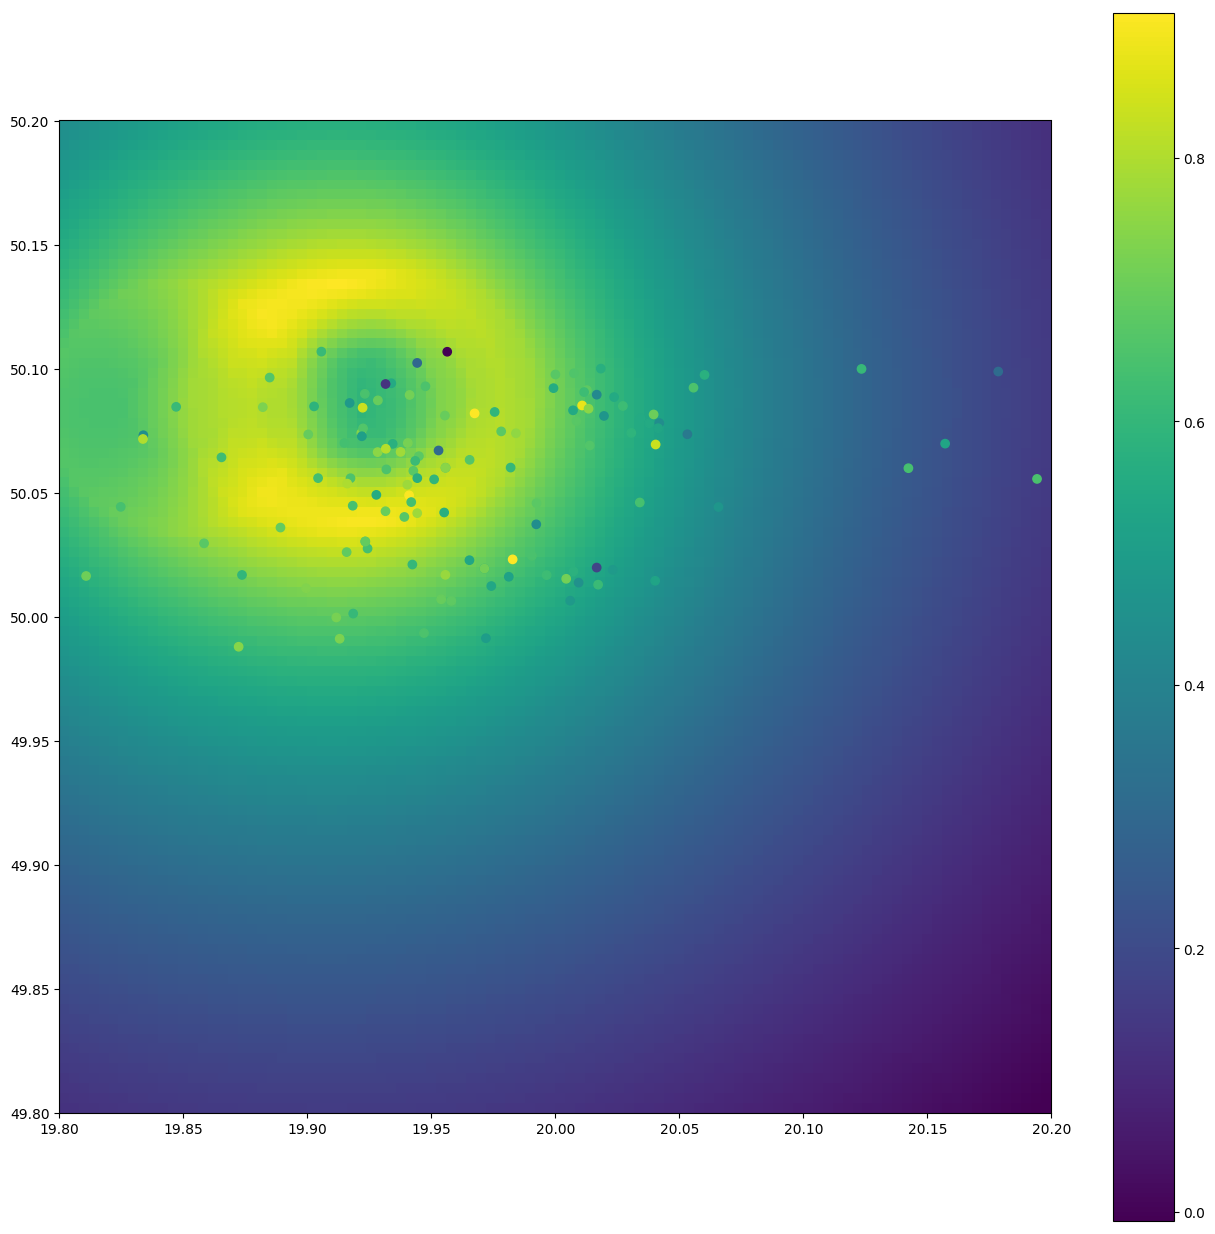

In [141]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.optimize
import math as m
import random as r
import csv

# Parametry grafiki
plt.figure(figsize=(16, 16), dpi=100, facecolor='w', edgecolor='k')
ymin = 49.8
ymax = 50.2
xmin = 19.8
xmax = 20.2
size = 0.2
array_size = 100

# ta funkcja zamienia indeksy i,j na odpowiadające im punkty na płaszczyźnie
def makePoint(i, j, array_size, size, xmin, ymin):
    i, j, array_size, size = float(i), float(j), float(array_size), float(size)
    
    side = 2*size/array_size # dl boku w jednostkach na mapie
    i = array_size -i -1
    
    ni = i*side + side/2
    nj = j*side + side/2
    
    return (nj + xmin, ni + ymin)

def education_cost(x, locations):
    lng, lat = x
    LICZBA_ZNACZACYCH_SZKOL = 5
    
    diff_lat = (locations[...,0] * 1000 - lat *1000) ** 2
    diff_lng = (locations[...,1] *1000 - lng *1000) ** 2
    
    diff = diff_lat + diff_lng
    diff = np.sqrt(diff)
    
#     b = np.zeros((locations.shape[0], locations.shape[1]+1))
#     b[:,:-1] = locations
#     b[:,-1:] = np.reshape(diff,(diff.size, 1))
    locations = np.c_[locations, diff]
    locations = np.sort(locations)
    locations = locations[:LICZBA_ZNACZACYCH_SZKOL]
    print(locations)
    values = locations[...,2]/ locations[...,3]

    
    return np.sum(values)

# Generacja heat-mapy
dummy = []
cost = np.zeros((array_size, array_size))
for i in range(len(cost)):
    for j in range(len(cost[i])):
        cost[i, j] = education_cost(makePoint(i, j, array_size, size, xmin, ymin), locations)

# Rysowanie obrazka
im = plt.imshow(cost, norm = matplotlib.colors.LogNorm(), extent = (xmin, xmax, ymin, ymax))
# plt.colorbar()

plt.scatter(locations[...,1], locations[...,0], c = locations[...,2], marker = 'o')
    
plt.colorbar()
plt.show()

# ax = plt.gca()
# for i in range(len(ancors)):
#     circle = plt.Circle(ancors[i], mypoint[i], color='r', fill=False, zorder = 0.2, label='Odległości od punktów pomiarowych')
#     ax.add_artist(circle)
    
# black_dots = plt.scatter([1, -1, 1, -1], [1, 1, -1, -1], color = 'black', label='Punkty pomiarowe')

# steps = np.asarray(steps)
# line = plt.Line2D(steps[...,0] , steps[...,1], color='grey', zorder = 0.3, label='Ścieżka algorytum opymalizującego')
# ax.add_artist(line)

# punkt,  = plt.plot(result.x[0], result.x[1], 'o', color='pink', zorder = 1.0, label = 'Wyznaczony punkt')

# plt.colorbar(im)
# plt.legend(handles=[black_dots, circle, line, punkt], loc ='upper right')#bbox_to_anchor=(0.3, -0.05))
# plt.title("Heat-mapa na obrazku przedstawia funkcję kosztu(MSE), \n wyznaczoną jako suma kwadratów błedów pomiarów od wszystkich punktów pomiarowych.")

# circle2 = plt.Circle(result.x, myMSE(result.x, ancors, mypoint) ** (1/2), color='pink', fill=False, zorder = 1.0)
# ax.add_artist(circle2)

# plt.savefig(savefile, dpi=100, facecolor='w', edgecolor='w')
# print("Zapisano grafikę w pliku %s" % (savefile))